In [ ]:
import zipfile
import os
zip_path = "/content/drive/MyDrive/Fingerprints dataset2.zip"
extract_path = "/content/Fingerprints2"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from collections import defaultdict
from PIL import Image
import os


In [ ]:

# Dataset path
dataset_root = "/content/Fingerprints2"


In [ ]:

# Prepare containers
class_counts = defaultdict(int)
image_shapes = defaultdict(int)



In [ ]:
import os
import matplotlib.pyplot as plt
dataset_dir = "/content/Fingerprints2"
class_counts_dict = {}
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in sorted(os.listdir(dataset_dir)):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ])
        class_counts_dict[class_name] = count
total_images = sum(class_counts_dict.values())
print("✅ Total Images in Dataset:", total_images)
print("✅ Image Count per Class:")
for cls, count in class_counts_dict.items():
    print(f"   {cls}: {count}")


✅ Total Images in Dataset: 6000
✅ Image Count per Class:
   A+: 565
   A-: 1009
   AB+: 708
   AB-: 761
   B+: 652
   B-: 741
   O+: 852
   O-: 712


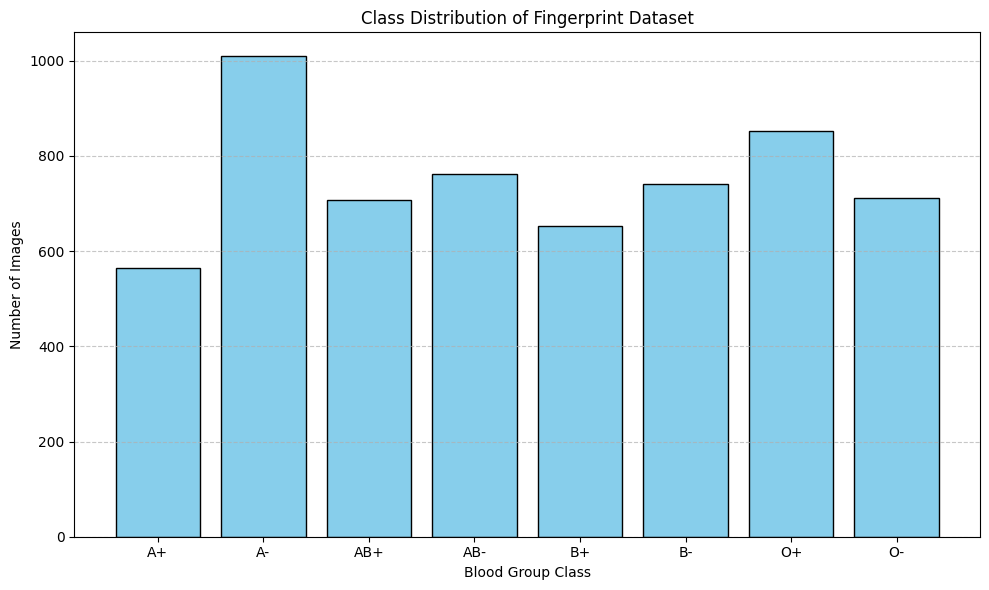

In [ ]:

# Plotting
labels = list(class_counts_dict.keys())
counts = list(class_counts_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Blood Group Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Fingerprint Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image
from collections import Counter
dataset_path = "/content/Fingerprints2"
image_shapes = Counter()
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    for filename in os.listdir(class_dir):
        if filename.lower().endswith(image_extensions):
            img_path = os.path.join(class_dir, filename)
            try:
                with Image.open(img_path) as img:
                    image_shapes[img.size] += 1
            except Exception as e:
                print(f"❌ Could not read {img_path}: {e}")
print("\n🖼️ Image Sizes:\n")
if image_shapes:
    for size, count in image_shapes.items():
        print(f"Size {size[0]}x{size[1]}: {count} images")
else:
    print("No images found or failed to read any image.")



🖼️ Image Sizes:

Size 96x103: 5956 images
Size 241x298: 44 images


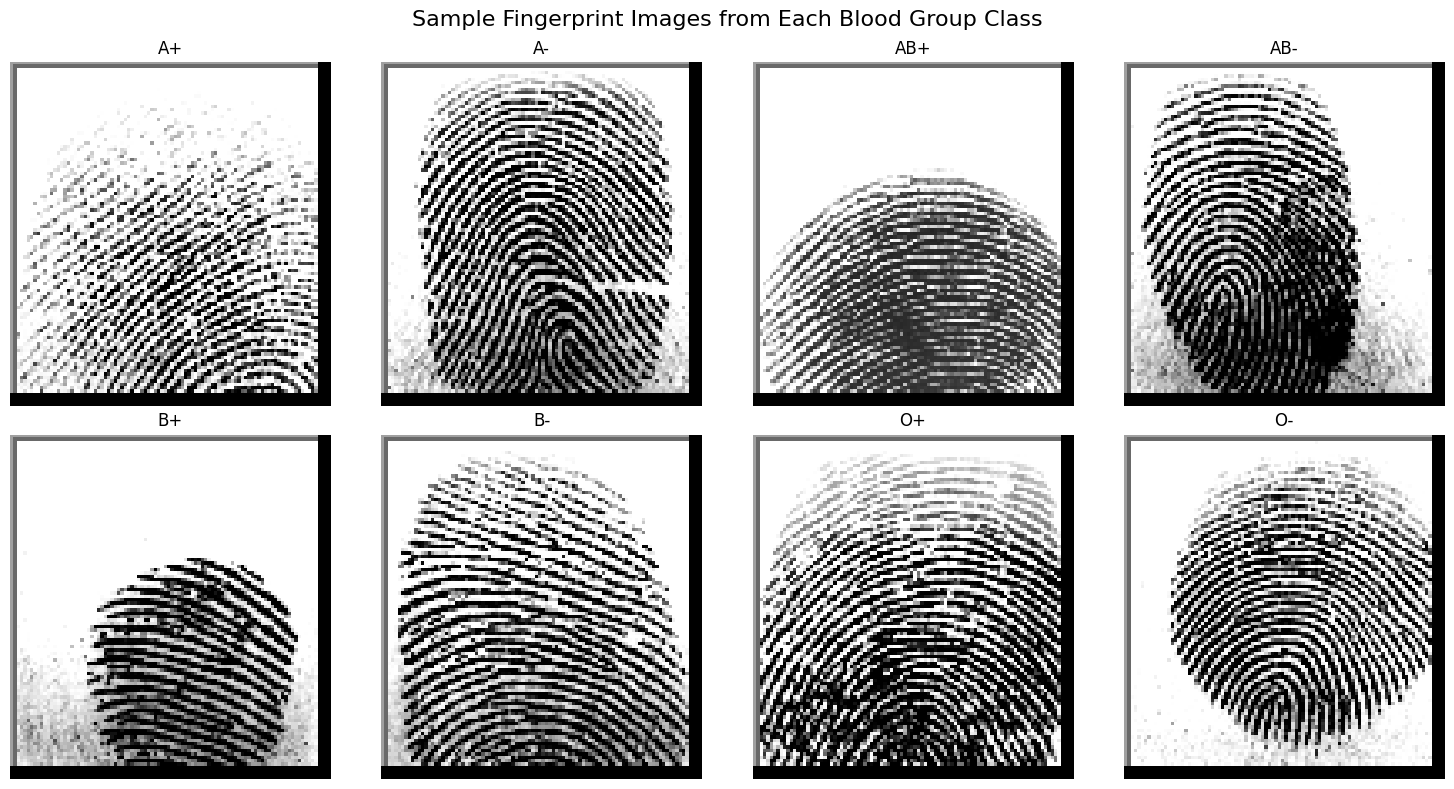

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
dataset_root = "/content/Fingerprints2"
sample_images = []
labels = []

for label_folder in sorted(os.listdir(dataset_root)):
    class_path = os.path.join(dataset_root, label_folder)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.lower().endswith(('.bmp', '.jpg', '.png', '.jpeg')):
                sample_images.append(os.path.join(class_path, file))
                labels.append(label_folder)
                break
plt.figure(figsize=(15, 8))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("L")
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

plt.suptitle("Sample Fingerprint Images from Each Blood Group Class", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
original_dataset_dir = "/content/Fingerprints2"
split_dataset_dir = "content/Fingerprints2/split_dataset2"
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
image_paths = []
labels = []

for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.lower().endswith(image_extensions):
                image_paths.append(os.path.join(class_dir, file_name))
                labels.append(class_name)

# Split dataset: 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    image_paths, labels, test_size=0.15, stratify=labels, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

def copy_files(image_list, labels_list, split_name):
    for img_path, label in zip(image_list, labels_list):
        dst_dir = os.path.join(split_dataset_dir, split_name, label)
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(img_path, os.path.join(dst_dir, os.path.basename(img_path)))
copy_files(X_train, y_train, 'train')
copy_files(X_val, y_val, 'val')
copy_files(X_test, y_test, 'test')

print("✅ Dataset successfully split into train/val/test with class balance.")


✅ Dataset successfully split into train/val/test with class balance.


In [ ]:
import shutil
split_dataset_dir = "/content/content/Fingerprints2/split_dataset2"
output_zip_path = "content/Fingerprints_split_dataset2.zip"
shutil.make_archive(base_name=output_zip_path.replace(".zip", ""),
                    format='zip',
                    root_dir=split_dataset_dir)

print(f"✅ Zipped dataset created at: {output_zip_path}")


✅ Zipped dataset created at: content/Fingerprints_split_dataset2.zip


In [ ]:
import zipfile
import os
zip_path = "/content/content/Fingerprints_split_dataset2.zip"
extract_path = "/content/Fingerprints_split_dataset2"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints_split_dataset2


In [ ]:
import os
base_dir = "/content/Fingerprints_split_dataset2"
splits = ['train', 'val', 'test']
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for split in splits:
    split_dir = os.path.join(base_dir, split)
    total_images = 0
    print(f"\n📁 {split.upper()} Set:")

    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len([
                f for f in os.listdir(class_dir)
                if f.lower().endswith(image_extensions)
            ])
            total_images += num_images
            print(f"  🔸 Class {class_name}: {num_images} images")

    print(f"✅ Total images in {split} set: {total_images}")



📁 TRAIN Set:
  🔸 Class A+: 395 images
  🔸 Class O+: 596 images
  🔸 Class AB+: 496 images
  🔸 Class B+: 456 images
  🔸 Class B-: 519 images
  🔸 Class O-: 498 images
  🔸 Class A-: 706 images
  🔸 Class AB-: 533 images
✅ Total images in train set: 4199

📁 VAL Set:
  🔸 Class A+: 85 images
  🔸 Class O+: 128 images
  🔸 Class AB+: 106 images
  🔸 Class B+: 98 images
  🔸 Class B-: 111 images
  🔸 Class O-: 107 images
  🔸 Class A-: 152 images
  🔸 Class AB-: 114 images
✅ Total images in val set: 901

📁 TEST Set:
  🔸 Class A+: 85 images
  🔸 Class O+: 128 images
  🔸 Class AB+: 106 images
  🔸 Class B+: 98 images
  🔸 Class B-: 111 images
  🔸 Class O-: 107 images
  🔸 Class A-: 151 images
  🔸 Class AB-: 114 images
✅ Total images in test set: 900


In [ ]:
%env CUDA_LAUNCH_BLOCKING=1

env: CUDA_LAUNCH_BLOCKING=1


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import resnet50, ResNet50_Weights
from torch.utils.data import DataLoader
import os
import time

# Debugging: Enable blocking to catch CUDA errors immediately
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Paths
train_dir = '/content/Fingerprints_split_dataset2/train'
val_dir = '/content/Fingerprints_split_dataset2/val'
test_dir = '/content/Fingerprints_split_dataset2/test'

# Hyperparameters
batch_size = 32
num_epochs = 50
learning_rate = 0.001

# Data transformations
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

val_test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=val_test_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transform)

class_to_idx = train_dataset.class_to_idx
val_dataset.class_to_idx = class_to_idx
test_dataset.class_to_idx = class_to_idx
print("Class to index mapping:", class_to_idx)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_classes = len(class_to_idx)
print(f"Detected {num_classes} classes: {list(class_to_idx.keys())}")

# Spatial Attention Module
class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        padding = kernel_size // 2
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg_out, max_out], dim=1)
        attention = self.sigmoid(self.conv(x_cat))
        return x * attention

# ResNet-50 with Spatial Attention
class ResNet50_SpatialAttention(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50_SpatialAttention, self).__init__()
        base_model = resnet50(weights=ResNet50_Weights.DEFAULT)

        self.conv1 = base_model.conv1
        self.bn1 = base_model.bn1
        self.relu = base_model.relu
        self.maxpool = base_model.maxpool

        self.layer1 = nn.Sequential(base_model.layer1, SpatialAttention())
        self.layer2 = nn.Sequential(base_model.layer2, SpatialAttention())
        self.layer3 = nn.Sequential(base_model.layer3, SpatialAttention())
        self.layer4 = nn.Sequential(base_model.layer4, SpatialAttention())

        self.avgpool = base_model.avgpool
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(2048, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

model = ResNet50_SpatialAttention(num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    val_acc = 100 * correct / total
    print(f"Validation Accuracy: {val_acc:.2f}%")

    scheduler.step()

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_acc = 100 * correct / total
print(f"Test Accuracy: {test_acc:.2f}%")


Using device: cuda
Class to index mapping: {'A+': 0, 'A-': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7}
Detected 8 classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 137MB/s]


Epoch [1/50], Loss: 1.5299, Train Acc: 37.44%
Validation Accuracy: 43.51%
Epoch [2/50], Loss: 1.2699, Train Acc: 47.01%
Validation Accuracy: 43.84%
Epoch [3/50], Loss: 1.1533, Train Acc: 52.42%
Validation Accuracy: 49.72%
Epoch [4/50], Loss: 0.9849, Train Acc: 61.11%
Validation Accuracy: 72.14%
Epoch [5/50], Loss: 0.8710, Train Acc: 66.47%
Validation Accuracy: 77.47%
Epoch [6/50], Loss: 0.7846, Train Acc: 69.56%
Validation Accuracy: 72.92%
Epoch [7/50], Loss: 0.7443, Train Acc: 71.28%
Validation Accuracy: 80.36%
Epoch [8/50], Loss: 0.6845, Train Acc: 73.35%
Validation Accuracy: 81.80%
Epoch [9/50], Loss: 0.6452, Train Acc: 74.28%
Validation Accuracy: 87.35%
Epoch [10/50], Loss: 0.6087, Train Acc: 75.99%
Validation Accuracy: 85.46%
Epoch [11/50], Loss: 0.5940, Train Acc: 76.02%
Validation Accuracy: 86.57%
Epoch [12/50], Loss: 0.6174, Train Acc: 75.80%
Validation Accuracy: 84.91%
Epoch [13/50], Loss: 0.6174, Train Acc: 74.97%
Validation Accuracy: 85.90%
Epoch [14/50], Loss: 0.6252, Train

In [ ]:
# Prediction on multiple test images with counting correct and wrong predictions
import glob

def predict_images_with_labels(test_images_folder, model, class_to_idx, transform):
    model.eval()
    idx_to_class = {v: k for k, v in class_to_idx.items()}

    image_paths = []
    for cls in os.listdir(test_images_folder):
        cls_folder = os.path.join(test_images_folder, cls)
        if os.path.isdir(cls_folder):
            for img_file in os.listdir(cls_folder):
                image_paths.append((os.path.join(cls_folder, img_file), cls))

    correct = 0
    total = 0

    for img_path, true_label in image_paths:
        image = Image.open(img_path)
        image_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image_tensor)
            probabilities = torch.softmax(output, dim=1)
            confidence, predicted_class = torch.max(probabilities, 1)
            predicted_label = idx_to_class[predicted_class.item()]
            confidence_score = confidence.item() * 100

            is_correct = predicted_label == true_label
            result = "Correct" if is_correct else "Wrong"
            print(f"Image: {os.path.basename(img_path)} -> Predicted: {predicted_label} (Confidence: {confidence_score:.2f}%) | Actual: {true_label} -> {result}")

            total += 1
            if is_correct:
                correct += 1

    print(f"Total Images: {total}, Correct Predictions: {correct}, Wrong Predictions: {total - correct}")
    accuracy = 100 * correct / total if total > 0 else 0
    print(f"Custom Test Accuracy: {accuracy:.2f}%")

# Usage example
test_images_folder = '/content/Fingerprints_split_dataset2/test'  # Replace with your folder path
predict_images_with_labels(test_images_folder, model, class_to_idx, val_test_transform)


Image: cluster_0_4189.BMP -> Predicted: A+ (Confidence: 99.97%) | Actual: A+ -> Correct
Image: cluster_0_5799.BMP -> Predicted: A+ (Confidence: 57.09%) | Actual: A+ -> Correct
Image: cluster_0_303.BMP -> Predicted: A+ (Confidence: 94.65%) | Actual: A+ -> Correct
Image: cluster_0_3152.BMP -> Predicted: A+ (Confidence: 99.98%) | Actual: A+ -> Correct
Image: cluster_0_5366.BMP -> Predicted: A+ (Confidence: 99.98%) | Actual: A+ -> Correct
Image: cluster_0_2609.BMP -> Predicted: A+ (Confidence: 99.80%) | Actual: A+ -> Correct
Image: cluster_0_2202.BMP -> Predicted: A+ (Confidence: 52.95%) | Actual: A+ -> Correct
Image: cluster_0_868.BMP -> Predicted: A+ (Confidence: 99.99%) | Actual: A+ -> Correct
Image: cluster_0_768.BMP -> Predicted: A+ (Confidence: 99.31%) | Actual: A+ -> Correct
Image: cluster_0_4493.BMP -> Predicted: A+ (Confidence: 99.93%) | Actual: A+ -> Correct
Image: cluster_0_5734.BMP -> Predicted: A+ (Confidence: 81.81%) | Actual: A+ -> Correct
Image: cluster_0_1851.BMP -> Predic

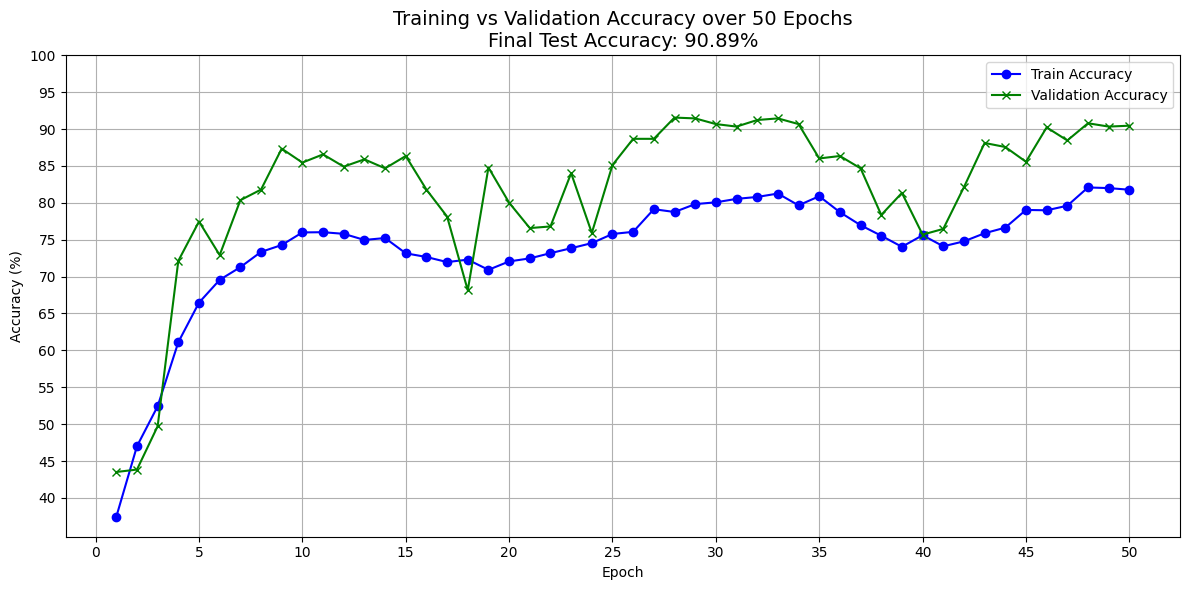

In [ ]:
import matplotlib.pyplot as plt

# Training Accuracy per epoch
train_acc_list = [
    37.44, 47.01, 52.42, 61.11, 66.47, 69.56, 71.28, 73.35, 74.28, 75.99,
    76.02, 75.80, 74.97, 75.23, 73.16, 72.66, 71.97, 72.30, 70.92, 72.06,
    72.47, 73.18, 73.85, 74.54, 75.78, 76.07, 79.14, 78.76, 79.83, 80.07,
    80.54, 80.80, 81.26, 79.66, 80.90, 78.73, 76.97, 75.54, 74.04, 75.61,
    74.11, 74.78, 75.88, 76.64, 79.04, 78.99, 79.61, 82.09, 82.00, 81.78
]

# Validation Accuracy per epoch
val_acc_list = [
    43.51, 43.84, 49.72, 72.14, 77.47, 72.92, 80.36, 81.80, 87.35, 85.46,
    86.57, 84.91, 85.90, 84.68, 86.35, 81.80, 78.14, 68.15, 84.79, 80.02,
    76.58, 76.80, 84.02, 75.92, 85.13, 88.68, 88.68, 91.56, 91.45, 90.68,
    90.34, 91.23, 91.45, 90.68, 86.02, 86.35, 84.68, 78.36, 81.35, 75.69,
    76.47, 82.13, 88.12, 87.57, 85.57, 90.23, 88.46, 90.79, 90.34, 90.46
]

# Epochs from 1 to 50
epochs = list(range(1, 51))

# Plotting Accuracy Curves
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc_list, marker='o', label='Train Accuracy', color='blue')
plt.plot(epochs, val_acc_list, marker='x', label='Validation Accuracy', color='green')

# Title and Labels
plt.title('Training vs Validation Accuracy over 50 Epochs\nFinal Test Accuracy: 90.89%', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.xticks(range(0, 51, 5))
plt.yticks(range(40, 101, 5))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Make sure your model is already loaded with best weights
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [ ]:
# Get class names from dataset
class_names = list(class_to_idx.keys())

cm = confusion_matrix(all_labels, all_preds)


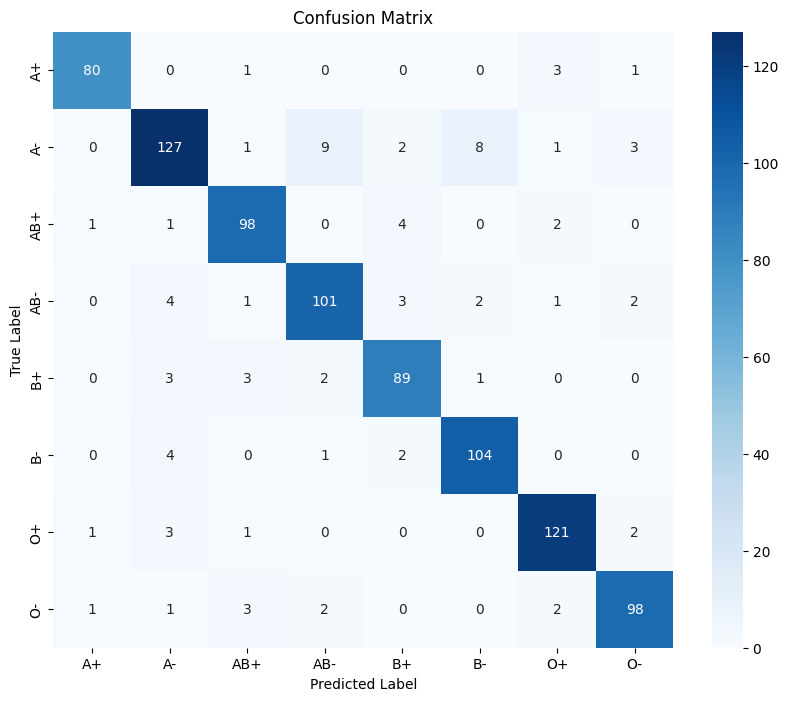

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(model)

ResNet50_SpatialAttention(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  